<h1>Содерждание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Загрузка-и-анализ-данных-из-файлов" data-toc-modified-id="Загрузка-и-анализ-данных-из-файлов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка и анализ данных из файлов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных-для-решения-задач-машинного-обучения" data-toc-modified-id="Подготовка-данных-для-решения-задач-машинного-обучения-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных для решения задач машинного обучения</a></span><ul class="toc-item"><li><span><a href="#Удаление-несущественных-данных" data-toc-modified-id="Удаление-несущественных-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Удаление несущественных данных</a></span></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Масштабирование-числовых-признаков" data-toc-modified-id="Масштабирование-числовых-признаков-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Масштабирование числовых признаков</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-моделей" data-toc-modified-id="Обучение-и-проверка-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение и проверка моделей</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Функция-для-расчёта-прибыли" data-toc-modified-id="Функция-для-расчёта-прибыли-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Функция для расчёта прибыли</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Выбор локации для скважины

## Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Подготовка

Импортируем библиотеки:

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import scipy

Импортируем инструменты для работы с алгоритмами машинного обучения:

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

Устанавливаем параметры:

In [ ]:
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')
matplotlib.style.use('seaborn-deep')
colors = sns.color_palette('crest', 8)

In [ ]:
state = np.random.RandomState(42)

## Загрузка и анализ данных из файлов

In [ ]:
df = [None,None,None]

In [ ]:
df[0] = pd.read_csv('/datasets/geo_data_0.csv')
df[1] = pd.read_csv('/datasets/geo_data_1.csv')
df[2] = pd.read_csv('/datasets/geo_data_2.csv')


РЕГИОН  0


,id,f0,f1,f2,product
74656,j1upi,-0.508078,0.897598,0.051006,78.893480
40868,vbcE1,0.211527,0.036053,1.296122,59.724043
51501,08hB5,0.377138,-0.326809,4.724347,84.855844


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
min,006OJ,-1.408605,-0.848218,-12.088328,0.000000
max,zzzLH,2.362331,1.343769,16.003790,185.364347


Полных дубликатов: 0


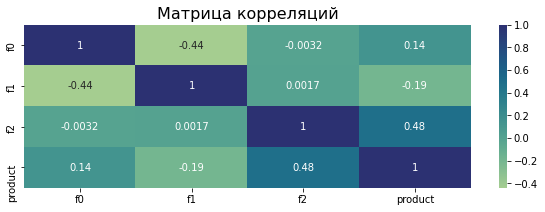


РЕГИОН  1


,id,f0,f1,f2,product
12773,gMcJM,0.671328,-10.761688,0.010977,3.179103
70146,YZ7EL,6.780702,0.624040,4.004002,107.813044
61006,iPrJT,-7.009704,-2.615316,4.006910,110.992147


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
min,0022J,-31.609576,-26.358598,-0.018144,0.000000
max,zzzvI,29.421755,18.734063,5.019721,137.945408


Полных дубликатов: 0


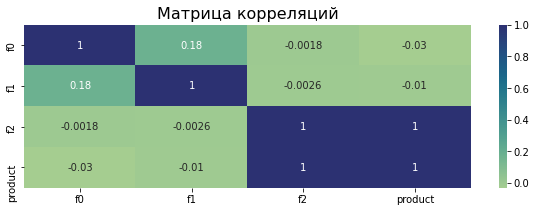


РЕГИОН  2


,id,f0,f1,f2,product
92466,dB1Gm,-1.087359,-0.363529,5.468611,156.901289
72996,nCEfr,2.506157,1.955087,5.247535,157.077890
59213,9kiDz,-0.328580,-0.392132,4.025383,112.977511


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
min,009Gl,-8.760004,-7.084020,-11.970335,0.000000
max,zzz9h,7.238262,7.844801,16.739402,190.029838


Полных дубликатов: 0


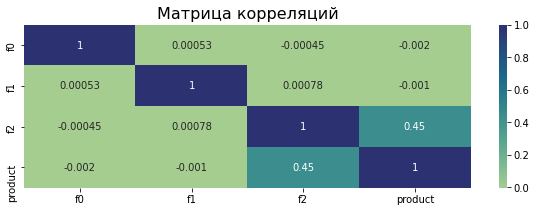

In [ ]:
for i in range(3):
    print('\nРЕГИОН ',i)
    display(df[i].sample(3))
    df[i].info()
    display(df[i].agg(func=['min','max']))
    print('Полных дубликатов:', df[i].duplicated().sum())
    # построение матрицы корреляций
    plt.figure(figsize=(10,3))
    corr_matrix = df[i].corr()
    sns.heatmap(corr_matrix,annot=True, cmap='crest')
    plt.title('Матрица корреляций', fontsize=16)
    plt.show()

### Вывод

1. Имеются отдельные таблицы по трём регионам. В каждой из них представлены данные о 100 000 объектов.
2. Пропусков и дубликатов не обнаружено.
3. Рассматриваются непрерывные числовые признаки `f0`, `f1`, `f2` и целевой признак `product`. Идентификатор `id` скважины не несёт смысловой нагрузки.
4. Масштаб значений признака `f2` превышает масштаб значений `f0` и `f1` на один порядок. Это не критично, однако учитывая то, что мы будем использовать линейную регрессию, - имеет смысл привести значения к одному масштабу.
5. Данные синтетические, поэтому вряд ли стоит рассуждать о характере корреляции между характеристиками скважины и объёмом запаса нефти в ней.
6. Тем не менее, во всех трёх регионах наблюдается сильная (от 0.45 до 1) корреляция между характеристикой `f2` и целевым признаком `product`.

## Подготовка данных для решения задач машинного обучения

### Удаление несущественных данных

Отбросим данные, не влияющие на целевой признак:
- id

In [ ]:
for i in range(3):
    df[i] = df[i].drop(['id'], axis=1)

### Разделение данных на выборки

Выделим входящие признаки и целевой признак:

In [ ]:
X = [pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
y = [pd.Series(),pd.Series(),pd.Series()]

In [ ]:
for i in range(3):
    X[i] = df[i].drop(['product'], axis=1)
    y[i] = df[i]['product']

Нам необходимо разделить данные на две выборки:
- обучающую
- тестовую

Тестовая выборка должна составлять одну треть от обучающей. Данные для разных регионов будем хранить в виде элементов списка.

In [ ]:
X_train = [pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
X_test = [pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
y_train = [pd.Series(),pd.Series(),pd.Series()]
y_test = [pd.Series(),pd.Series(),pd.Series()]

In [ ]:
for i in range(3):
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(X[i], y[i], test_size=0.25, random_state=state)
    X_train[i] = X_train[i].reset_index(drop=True)
    X_test[i] = X_test[i].reset_index(drop=True)
    y_train[i] = y_train[i].reset_index(drop=True)
    y_test[i] = y_test[i].reset_index(drop=True)
    # проверим размерность получившихся выборок
    print('\nРЕГИОН ', i)
    print('Размер X_train:\t{0}\tРазмер y_train:\t{1}'.format(X_train[i].shape,y_train[i].shape))
    print('Размер X_test::\t{0}\tРазмер y_test:\t{1}'.format(X_test[i].shape,y_test[i].shape))


РЕГИОН  0
Размер X_train:	(75000, 3)	Размер y_train:	(75000,)
Размер X_test::	(25000, 3)	Размер y_test:	(25000,)

РЕГИОН  1
Размер X_train:	(75000, 3)	Размер y_train:	(75000,)
Размер X_test::	(25000, 3)	Размер y_test:	(25000,)

РЕГИОН  2
Размер X_train:	(75000, 3)	Размер y_train:	(75000,)
Размер X_test::	(25000, 3)	Размер y_test:	(25000,)


### Масштабирование числовых признаков

In [ ]:
for i in range(3):
    scaler = StandardScaler()
    X_train[i] = scaler.fit_transform(X_train[i])
    X_test[i] = pd.DataFrame(scaler.transform(X_test[i]))

## Обучение и проверка моделей

In [ ]:
# готовим список для хранения моделей, обученных для разных регионов
models = [None,None,None]

# готовим список для хранения предсказаний на тестовых выборках для разных регионов
predictions = [None,None,None]

# готовим таблицу для сохранения показателей моделей по регионам
result = pd.DataFrame(np.array([['РЕГИОН 0', 0.0, 0.0],
                                ['РЕГИОН 1', 0.0, 0.0],
                                ['РЕГИОН 2', 0.0, 0.0]
                               ]),
                      columns=['Region','Mean Predicted Product','RMSE']
                     )

In [ ]:
for i in range(3):
    # согласно заданию - используем линейную регрессию
    models[i] = LinearRegression() 
    # обучаем модель на данных соответствующего региона
    models[i].fit(X_train[i],y_train[i]) 
    # получаем предсказание для тестовой выборки
    predictions[i] = pd.Series(models[i].predict(X_test[i]),index=X_test[i].index)
    # вычисляем среднее значение предсказанного объёма запасов в скважине
    mean_prediction = predictions[i].mean() 
    # записываем среднее значение в таблицу
    result.loc[i,'Mean Predicted Product'] = mean_prediction 
    # записываем в таблицу RMSE модели (параметр squared=False позволяет получить RMSE, а не MSE)
    result.loc[i,'RMSE'] = mean_squared_error(y_test[i], predictions[i], squared=False) 
    
display(result)

,Region,Mean Predicted Product,RMSE
0,РЕГИОН 0,92.3988,37.7566
1,РЕГИОН 1,68.587803,0.889947
2,РЕГИОН 2,95.092303,40.23735


### Выводы

1. Для регионов 0 и 2 модели дают более высокую оценку запасов нефти, чем в регоне 1. Однако корень из среднеквадратической ошибки моделей для этих регионов тоже очень велик - он составляет почти половину от среднего предсказания для скважины.
2. Для региона 1 модель предсказывает более скудные запасы нефти в скважинах. Однако точность у модели для этого региона несравненно выше, чем у моделей для регионов 0 и 2. Это может снизить риски при принятии решения в пользу этого региона.

## Подготовка к расчёту прибыли

Подготовимся к расчёту прибыли:
- все ключевые значения для расчётов сохраним в отдельных переменных;
- рассчитаем достаточный объём сырья для безубыточной разработки новой скважины;
- сравним полученный объём сырья со средним запасом в каждом регионе.

In [ ]:
# бюджет на разработку скважин в регионе — 10 млрд рублей
BUDGET = 10000000000
# тысяча баррелей сырья приносит 450000 рублей дохода
INCOME_RATE = 450000
# при разведке региона исследуют 500 точек
TOTAL = 500
# из них выбирают 200 лучших для разработки
SELECT = 200
# вероятность убытков должна быть меньше 2.5%
ALPHA = 0.025

In [ ]:
min_good_well_product = (BUDGET/SELECT)/INCOME_RATE
print('Средний объём сырья в скважине, который позволит разработать её без убытков: {:.2f} тыс. баррелей.'
      .format(min_good_well_product))

Средний объём сырья в скважине, который позволит разработать её без убытков: 111.11 тыс. баррелей.


### Выводы

Средний объём запасов в скважине, который обеспечит безубыточную разработку, - 111 тыс. баррелей. Это больше, чем среднее прогнозируемое значение во всех трёх регионах (92, 69 и 95 тыс. баррелей, соответственно). Таким образом, скважины для разработки необходимо отбирать - иначе добыча, скорее всего, окажется убыточной.

## Расчёт прибыли и рисков 

### Функция для расчёта прибыли

In [ ]:
def income(y_true,y_pred):
    # сортируем скважины по убыванию ПРЕДСКАЗАННОГО объема запасов
    y_pred_sorted = y_pred.sort_values(ascending=False)
    # выбираем РЕАЛЬНЫЕ показатели 200 лучших (согласно предсказаниям) скважин
    selected = y_true[y_pred_sorted.index][:SELECT]
    # умножаем прибыль с единицы запасов на общий РЕАЛЬНЫЙ объём в выбранных скважинах
    # и вычитаем бюджет на разработку (предполагается, что мы потратили его весь)
    return (INCOME_RATE * selected.sum() - BUDGET)

In [ ]:
def bootstrap(i):
    values = []
    for n in range(1000):
        # выбираем 500 случайных скважин ("разведанных")
        y_subsample = y_test[i].sample(n=TOTAL, replace=True, random_state=state)
        # получаем предсказание прибыли от модели
        pred_subsample = predictions[i][y_subsample.index]
        # добавляем новое значение прибыли в список
        values.append(income(y_subsample,pred_subsample))

    values = pd.Series(values)

    mean = values.mean()
    # находим нижнюю границу 95%-ого доверительного интервала
    lower = values.quantile(0.025)
    # находим верхнюю границу 95%-ого доверительного интервала
    upper = values.quantile(0.975)
    # находим вероятность убытка (количество отрицательных значений делим на общее количество значений)
    loss = (values < 0).mean()#values[values<0].count()/values.count()
    
    print('\n\nРЕГИОН', i)
    plt.figure(figsize=(14,7))
    sns.histplot(x=values,bins=50)
    plt.title('Распределение прибыли')
    plt.show()
    print('Средняя прибыль: {0:.0f}'.format(mean))
    print('95%-й доверительный интервал: от {0:.0f} до {1:.0f}'.format(lower,upper))
    print('Риск убытков: {}'.format(loss))



РЕГИОН 0


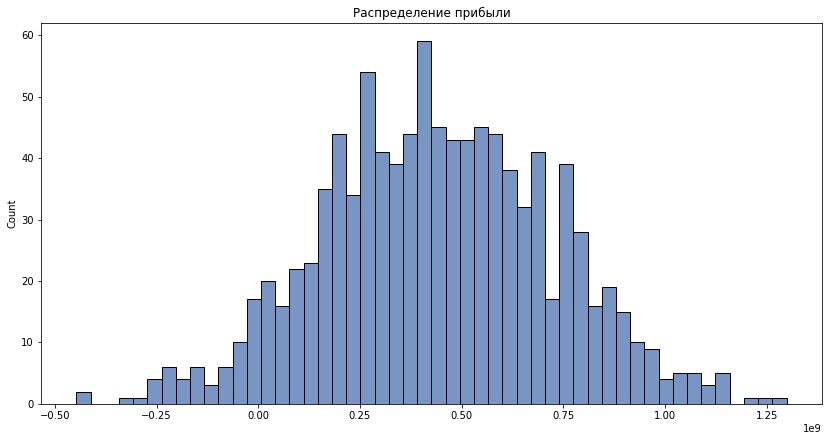

Средняя прибыль: 440446620
95%-й доверительный интервал: от -129698264 до 980351535
Риск убытков: 0.058


РЕГИОН 1


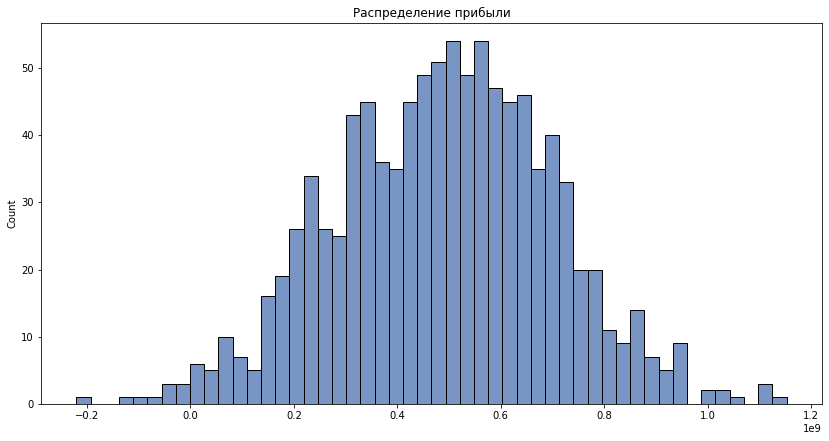

Средняя прибыль: 489036146
95%-й доверительный интервал: от 63878579 до 900130456
Риск убытков: 0.01


РЕГИОН 2


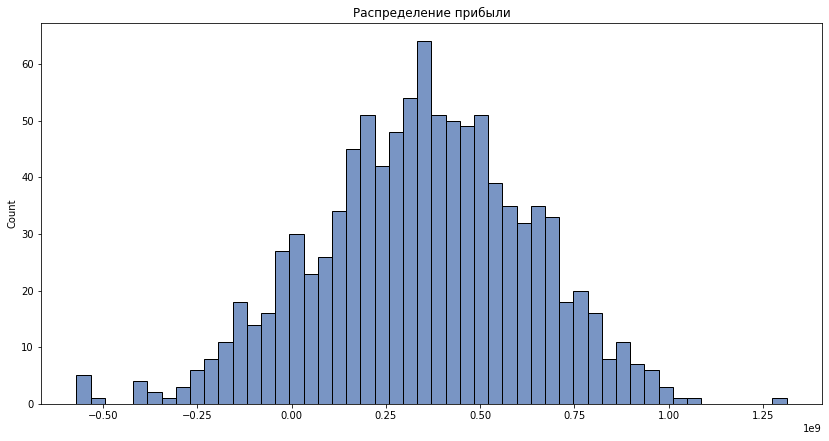

Средняя прибыль: 343559871
95%-й доверительный интервал: от -210907751 до 884771215
Риск убытков: 0.119


In [ ]:
for i in range(3):
    bootstrap(i)

## Выводы

1. Вероятность убытков ниже 2.5 % только в регионе 1 (а именно - 1 %).
2. В этом же регионе модель предсказывает наибольшую среднюю прибыль (490 697 752 руб.).
3. Для разработки новых скважин следует выбрать регион 1 (второй из трёх). С вероятностью 95% прибыль от разработки составит от 63 878 579 руб. до 900 130 456 руб. (будет положительной).